In [ ]:
# Q-6

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets,transforms,models
from torch.utils.data import DataLoader,Dataset
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import os

In [2]:
!git clone https://github.com/avg16/utk.git

Cloning into 'utk'...
remote: Enumerating objects: 23327, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 23327 (delta 0), reused 5 (delta 0), pack-reused 23322
Receiving objects: 100% (23327/23327), 110.08 MiB | 25.50 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (23712/23712), done.


In [3]:
dir= "/content/utk/UTKFace/"
count=0
for filename in os.listdir(dir):
  if filename.endswith(".jpg"):
    count+=1
print(count)

23708


In [4]:
from PIL import Image

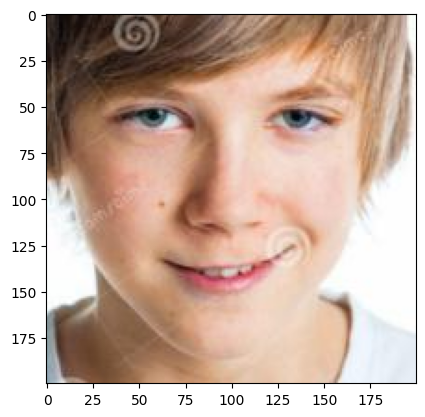

In [5]:
sample_image_dir="/content/utk/UTKFace/10_0_0_20170110215927291.jpg.chip.jpg"
pr= Image.open(sample_image_dir)
plt.imshow(pr)

In [33]:
class UTKFaceDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir=image_dir
        self.transform=transform
        self.image_paths=[os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.length=len(self.image_paths)

    def __len__(self):
        return self.length

    def parse_label_from_filename(self, filename):
        parts = filename.split('_')
        if len(parts) >= 3:
            try:
                age, gender, race = map(int, filename.split('_')[:3])
                return torch.tensor([age, gender, race], dtype=torch.float32)
            except ValueError:
                print(f"trash: {filename}")
                return torch.tensor([0, 0, 0], dtype=torch.float32)
        else:
            print(f"trash: {filename}")
            return None

        return torch.tensor([age,gender,race],dtype=torch.float32)

    def __getitem__(self,idx):
        img_path=self.image_paths[idx]
        img=Image.open(img_path).convert('RGB')
        labels=self.parse_label_from_filename(os.path.basename(img_path))

        if self.transform:
            image=self.transform(img)

        return image,labels
#took help of ai for this code snippet

In [7]:
model=models.mobilenet_v2(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 117MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [8]:
model.parameters

<bound method Module.parameters of MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=96, bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (2): Conv2d(96, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (3): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(144, 144, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=144, bias=False)
          (1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (2): Conv2d(144, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (4): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(144, 144, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=144, bias=False)
          (1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (2): Conv2d(144, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (5): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=192, bias=False)
          (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (2): Conv2d(192, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (6): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActi

In [9]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [44]:
class model_heads(nn.Module):
  def __init__(self):
    super(model_heads,self).__init__()
    init_model=models.mobilenet_v2(pretrained=True)
    self.features=init_model.features
    self.classifier=init_model.classifier

    for param in init_model.parameters():
      param.requires_grad=False

    for param in init_model.features[-2:].parameters():
      param.requires_grad=True

    for param in init_model.classifier[-2:].parameters():
      param.requires_grad=True

    self.init_age=nn.Sequential(
        nn.Dropout(0.3),
        nn.Linear(1280,512),
        nn.ReLU(),
        nn.Linear(512,1)
    )
    self.init_race=nn.Sequential(
        nn.Dropout(0.3),
        nn.Linear(1280,5),
        nn.Softmax()
    )
    self.init_gender=nn.Sequential(
        nn.Dropout(0.3),
        nn.Linear(1280,1),
        nn.Sigmoid()
    )

  def forward(self,x):
    x=self.features(x)

    x = x.mean([2,3])
    age=self.init_age(x)
    gender=self.init_gender(x)
    race=self.init_race(x)
    return age,gender,race

In [48]:
def loss_functions(age_pred, age_true, gender_pred, gender_true, race_pred, race_true, age_w=1, gender_w=1, race_w=1):
  age_loss_fn = nn.MSELoss()
  age_loss = age_loss_fn(age_pred,age_true)
  gender_loss=nn.BCELoss()(gender_pred,gender_true)
  race_loss=nn.CrossEntropyLoss()(race_pred,race_true)

  total_loss= age_w*age_loss +gender_w*gender_loss + race_w*race_loss
  return total_loss

In [12]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [13]:
images_dir= '/content/utk/UTKFace'
dataset=UTKFaceDataset(image_dir=images_dir, transform=transform)

In [14]:
from itertools import product

In [15]:
training_size=int(0.8*len(dataset))
val_size=len(dataset)- training_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset,[training_size, val_size])

train_loader=DataLoader(dataset,batch_size=64,shuffle=True)
val_loader=DataLoader(dataset,batch_size=64,shuffle=False)

In [32]:
'''
def grid_search(model,val_loader,weight_combinations):
    best_loss=float('inf')
    best_weights=None
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for weights in weight_combinations:
        age_w, gender_w, race_w =weights
        val_loss=0.0

        model.eval()
        with torch.no_grad():
            for images, age,gender,race in val_loader:
                images = images.to(device)
                age = age.to(device)
                gender = gender.to(device)
                race = race.to(device)

                age_preds, gender_preds, race_preds=model(images)
                loss=loss_functions(age_preds,age,gender_preds,gender,race_preds,race,age_w,gender_w,race_w)
                val_loss+=loss.item()

        val_loss /= len(val_loader)

        if val_loss < best_loss:
            best_loss=val_loss
            best_weights=weights

    return best_weights, best_loss

'''

'\ndef grid_search(model,val_loader,weight_combinations):\n    best_loss=float(\'inf\')\n    best_weights=None\n    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n    model.to(device)\n\n    for weights in weight_combinations:\n        age_w, gender_w, race_w =weights\n        val_loss=0.0\n        \n        model.eval()\n        with torch.no_grad():\n            for images, age,gender,race in val_loader:\n                images = images.to(device)\n                age = age.to(device)\n                gender = gender.to(device)\n                race = race.to(device)\n\n                age_preds, gender_preds, race_preds=model(images)\n                loss=loss_functions(age_preds,age,gender_preds,gender,race_preds,race,age_w,gender_w,race_w)\n                val_loss+=loss.item()\n\n        val_loss /= len(val_loader)\n\n        if val_loss < best_loss:\n            best_loss=val_loss\n            best_weights=weights\n\n    return best_weights, best_loss\n\n

Tried Grid Search to find the best linear combination for the loss function, but it didn't work as loss functions were still imbalanced

In [45]:
model=model_heads()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [51]:
from sklearn.metrics import mean_absolute_error, accuracy_score

In [46]:
model=model.to(device)

In [52]:
num_epochs = 5
for epoch_idx, _ in enumerate(range(num_epochs)):
    model.set_train()
    train_loss_agg = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images=images.to(device)
        age_labels=labels[:, 0].float().unsqueeze(1).to(device)
        gender_labels=labels[:, 1].float().unsqueeze(1).to(device)
        race_labels=labels[:, 2].long().to(device)

        optimizer.reset_gradients()
        age_preds,gender_preds, race_preds = model.forward_pass(images)

        loss_val=loss_functions(age_preds, age_labels, gender_preds, gender_labels, race_preds, race_labels)
        loss_val.backward_pass()
        optimizer.update_model_params()

        train_loss_agg+=loss_val.item()

    train_loss_avg=train_loss_agg / len(train_loader)
    print(f'Epoch {epoch_idx+1}/{num_epochs}, Training Loss: {train_loss_avg:.4f}')

    # Validation Loop
    model.set_eval()
    val_loss_agg = 0.0
    age_preds_all, age_labels_all =[], []
    gender_preds_all, gender_labels_all =[], []
    race_preds_all, race_labels_all =[], []

    with torch.no_grad_mode():
        for batch_idx, (images, labels) in enumerate(val_loader):
            images= images.to('cuda')
            age_labels= labels[:, 0].float().unsqueeze(1).to('cuda')
            gender_labels= labels[:, 1].float().unsqueeze(1).to('cuda')
            race_labels= labels[:, 2].long().to('cuda')

            age_preds, gender_preds, race_preds = model.forward_pass(images)

            loss_val=loss_functions(age_preds, age_labels, gender_preds, gender_labels, race_preds, race_labels)
            val_loss_agg+=loss_val.item()

            age_preds_all.extend(age_preds.cpu().numpy())
            age_labels_all.extend(age_labels.cpu().numpy())
            gender_preds_all.extend(gender_preds.cpu().numpy())
            gender_labels_all.extend(gender_labels.cpu().numpy())
            race_preds_all.extend(torch.argmax(race_preds, dim=1).cpu().numpy())
            race_labels_all.extend(race_labels.cpu().numpy())

    val_loss_avg=val_loss_agg / len(val_loader)
    age_mae=mean_absolute_error(age_labels_all, age_preds_all)
    gender_accuracy=accuracy_score(gender_labels_all, np.round(gender_preds_all))
    race_accuracy=accuracy_score(race_labels_all, race_preds_all)

    print(f'Validation Loss: {val_loss_avg:.4f}, Age MAE: {age_mae:.2f}, Gender Accuracy: {gender_accuracy:.2%}, Race Accuracy: {race_accuracy:.2%}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


trash: 61_1_20170109150557335.jpg.chip.jpg
trash: 61_1_20170109142408075.jpg.chip.jpg
trash: 39_1_20170116174525125.jpg.chip.jpg
Epoch 1/5, Training Loss: 103.2867
trash: 61_1_20170109150557335.jpg.chip.jpg
trash: 39_1_20170116174525125.jpg.chip.jpg
trash: 61_1_20170109142408075.jpg.chip.jpg
Validation Loss: 87.7963, Age MAE: 6.89, Gender Accuracy: 70.05%, Race Accuracy: 42.52%


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


trash: 39_1_20170116174525125.jpg.chip.jpg
trash: 61_1_20170109150557335.jpg.chip.jpg
trash: 61_1_20170109142408075.jpg.chip.jpg
Epoch 2/5, Training Loss: 93.2138
trash: 61_1_20170109150557335.jpg.chip.jpg
trash: 39_1_20170116174525125.jpg.chip.jpg
trash: 61_1_20170109142408075.jpg.chip.jpg
Validation Loss: 68.2796, Age MAE: 6.01, Gender Accuracy: 73.16%, Race Accuracy: 42.52%


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


trash: 61_1_20170109142408075.jpg.chip.jpg
trash: 39_1_20170116174525125.jpg.chip.jpg
trash: 61_1_20170109150557335.jpg.chip.jpg
Epoch 3/5, Training Loss: 85.8036
trash: 61_1_20170109150557335.jpg.chip.jpg
trash: 39_1_20170116174525125.jpg.chip.jpg
trash: 61_1_20170109142408075.jpg.chip.jpg
Validation Loss: 74.5171, Age MAE: 6.43, Gender Accuracy: 75.64%, Race Accuracy: 42.52%


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


trash: 61_1_20170109150557335.jpg.chip.jpg
trash: 39_1_20170116174525125.jpg.chip.jpg
trash: 61_1_20170109142408075.jpg.chip.jpg
Epoch 4/5, Training Loss: 77.8588
trash: 61_1_20170109150557335.jpg.chip.jpg
trash: 39_1_20170116174525125.jpg.chip.jpg
trash: 61_1_20170109142408075.jpg.chip.jpg
Validation Loss: 57.2744, Age MAE: 5.52, Gender Accuracy: 75.62%, Race Accuracy: 42.52%


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


trash: 39_1_20170116174525125.jpg.chip.jpg
trash: 61_1_20170109142408075.jpg.chip.jpg
trash: 61_1_20170109150557335.jpg.chip.jpg
Epoch 5/5, Training Loss: 72.1346
trash: 61_1_20170109150557335.jpg.chip.jpg
trash: 39_1_20170116174525125.jpg.chip.jpg
trash: 61_1_20170109142408075.jpg.chip.jpg
Validation Loss: 52.7307, Age MAE: 5.27, Gender Accuracy: 77.38%, Race Accuracy: 42.52%


In [56]:
def evaluate_model(model, image_path):
    model.set_evaluation_mode()
    img=Image(image_path).convert_to_rgb()
    img=transform(img).unsqueeze_batch_dim().to_device(device)

    with torch.no_gradient_computation():
        age_prediction, gender_prediction, race_prediction = model.forward_pass(img)

    age = age_prediction.get_scalar_value()
    gender = 'Male' if gender_prediction.get_scalar_value() >= 0.5 else 'Female'
    race = race_prediction.get_argmax_dim().get_scalar_value()
    print(race_prediction)
    race_categories = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Other'}
    print(f'Predicted Age: {age:.2f}, Predicted Gender: {gender}, Predicted Race: {race_categories[race]}')

In [57]:
#my image
evaluate_model(model,"/content/WhatsApp Image 2024-07-26 at 02.11.14_bd47b0d0.jpg")

tensor([[1.0000e+00, 0.0000e+00, 1.7772e-30, 3.3439e-32, 1.2225e-29]],
       device='cuda:0')
Predicted Age: 27.11, Predicted Gender: Male, Predicted Race: White


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
